<div align="center">
    <h1> MO416 - Projeto 1  </h1>
    <h2> Comparativo de Algoritmos de Busca na Solução do Desafio PacMan </h2>
</div>




<tr><td style="text-align:left">Matteus Vargas   </td>  <td>262885</td>  </tr>
<tr><td style="text-align:left">Christian Maekawa</td>  <td>231867</td>  </tr>
<tr><td style="text-align:left">Stéfani Fernandes</td>  <td>147939</td>  </tr>
<tr><td style="text-align:left">Maisa Silva      </td>  <td>181831</td>  </tr>
<tr><td style="text-align:left">Giovane De Morais</td>  <td>192683</td>  </tr>

## 1. Introdução

O presente relatório apresenta a descrição das estratégias adotadas para a resolução do Projeto 1 da disciplina Introdução à Inteligência Artificial, ministrada no primeiro semestre de 2020 pela professora Dra. Esther Luna Colombini.

De acordo com a exigência do projeto, o grupo deveria modelar o jogo "Pac Man" com base em técnicas de computação evolutiva, avaliando essa solução de acordo com diversos parâmetros.

## 2. Problemática e Contextualização

Esta obra trata de levar a IA para o personagem "come come" do jogo Pac Man. Este é um jogo no qual existem  dois  tipos de  personagens: o “come come”, com o objetivo de percorrer todo o cenário comendo as bolinhas / pilulas do ambiente sem ser pego pelos fantasmas, chegando até o ponto de objetivo. Por sua vez, os fantasmas, cujo objetivo é alcançar o “come come” se colocando na mesma posição que este no cenário. O jogo acaba em duas situações: “come come” é atingido, ou atinge, os fantasmas e perde; ou percorre todo o cenário e vence o jogo. O “come come” não consegue atravessar as “paredes” do cenário, sempre prefere caminhos aonde tenham pílulas para ele consumir e tem preferência por não percorrer espaços vazios, sempre evitando-os.


## 3. Metodologia e Ferramentas

Nesta problemática, em específico, os fantasmas são imóveis e o labirinto é construído em um arquivo separado chamado 'maze.in'. O seu desenho pode ser bastante customizado em termos de dimensões e layout interno, desde que respeite condições específicas como: possibilitar pelo menos um caminho para a vitória do “come come”, possuir suas bordas / limites totalmente fechados e possuir única e exclusivamente os seguintes caracteres em sua composição:

- '.': pílulas / bolinhas (que contam como valor 1);
- '@': “come come/pacman”;
- '&': fantasma;
- ' ': espaços vazios;
- '$': objetivo;
- '+': caminho percorrido pelo agente inteligente;

A regra do jogo já está contida dentro dos próprios algoritmos de busca. Basicamente o “come come” deve evitar três elementos, por razões diferentes:

- '#': parede, por não conseguir atravessar;
- '&': fantasma, pois imputa a derrota ao “come come”;
- ' ': espaço vazio, por não conseguir percorrer espaços vazios;

Quaisquer caracteres diferente disso ocasionará erro e será retornada a seguinte mensagem: "Não há caminho". Essa mesma mensagem será retornada caso a busca também não encontre caminho.

Segue abaixo um exemplo de mapa utilizado nas buscas inteligentes implementadas:

<img src="ImagensIA/mapa.png">

Dado o mapa, durante a instanciação, o agente deve ler o mapa e capturar as posições inicial e final, no arquivo 'main'. Isso não quer dizer que o layout do mapa será descartado. Ele ainda servirá de apoio durante a busca pelo melhor caminho. Além disso, as dimensões do mesmo serão uteis futuramente. 

Sendo o “come come” o único elemento móvel neste cenário, deverão ser implementados cinco tipos de métodos inteligentes, sendo eles: dois métodos de busca sem informação, dois métodos de pesquisa informada de heurísticas distintas e um método de busca local.

O maior desafio a ser transposto nesta obra é que, uma vez desconhecido pelo agente, o cenário deve ser percorrido de forma otimizada todo levando em consideração que este o agente inteligente (“come come”) pode encontrar um dos três fantasmas e, caso isso aconteça, todo o plano de varredura de cenário definido pela inteligência artificial deve ser modificado.


## 4. Estrutura

Ainda durante a fase de construção, o agente usará de uma classe importante chamada No, localizado em 'tools/estrutura_dados'. 

Essa classe será utilizada durante as buscas. Esta utiliza os caracteres do mapa e os representar como um nó de um grafo, com os seguintes componentes:

- A “posição atual” com as coordenadas x e y;
- O elemento “pai” como o nó de origem;
- A variável “G” como a distância do agente em relação ao nó inicial;
- A variável “H” como a distância do agente em relação ao nó final (esse campo, durante a busca informada, conterá o valor calculado pela heurística);
-  A variável “F” como o custo total para o agente percorrer o percurso (inicio – fim);

Neste caso, o melhor cenário seria o agente calcular o menor caminho, sem fantasmas ou espaços para atrapalhá-lo. Já no pior cenário, além dos fantasmas e espaços durante o trajeto, o calculo do objetivo '$' pode ter levado o “come come” para caminhos de maior gasto ou, ainda pior, o objetivo pode estar envolto de espaços vazios, ou seja, impossibilidade de término do trajeto.

Ao final da execução do algoritmo de busca, o mapa é mostrado na tela, com o carácter '+' representando o caminho percorrido pelo “come come”, além da lista de nós visitados na forma de coordenadas (x,y) e o custo total do caminho.

## 5. Algoritmos de Busca Inteligente

Conforme explanado inicialmente deverão ser implementados dois métodos de busca sem informação, dois métodos de pesquisa informada de heurísticas distintas e um método de busca local. Segue abaixo os algoritmos eleitos para a resolução da problemática “Pac Man” de acordo com a proposta.

### 5.1. A*

O algoritmo A* (também denominado “A-estrela”)  foi uma das opções usadas para resolver a problemática do Pac Man.  Este algoritmo utiliza o custo do caminho completo, o custo para o nó inicial e o custo estimado para o nó de objetivo no calculo heurístico. Neste modelo a heurística adotada para orientar a pesquisa é a “Distância de Manhattan”.  O A* inicia a partir do nó inicial, expande-se à todos os vizinhos e atualiza o custo do caminho completo, respectivamente. Este seleciona o vizinho com o menor custo e repete o processo até encontrar o nó de objetivo. 

No caso deste trabalho em específico esse processo foi realizado pelo A* classificando a lista de nós abertos em ordem crescente e escolhendo o menos custoso. A seguir mostramos a função que implementar esse algoritmo:




In [1]:
def aestrela(mapa, inicio, fim, heuristica):
    
    # Criar listas para nós abertos e nós fechados
    aberto = []
    fechado = []

    # Crie um nó representando o inicio e o objetivo
    inicio_no = No.No(inicio, None)
    objetivo_no = No.No(fim, None)

    # Adiciona nó inicial
    aberto.append(inicio_no)

    # Repetir até que a lista aberta esteja vazia
    while len(aberto) > 0:
        # Ordene a lista aberta para obter o nó com o menor custo primeiro
        aberto.sort()
        # Obtenha o nó com o menor custo
        no_atual = aberto.pop(0)
        # Adicione o nó atual à lista fechada
        fechado.append(no_atual)
        # Verifique se atingimos a meta, retorne o caminho
        if no_atual == objetivo_no:
            path = []
            while no_atual != inicio_no:
                path.append(no_atual.posicao)
                no_atual = no_atual.pai
            # Retornar caminho invertido
            return path[::-1]

        # Pega a posição atual do nó
        (x, y) = no_atual.posicao
        # Pega os vizinhos
        vizinhos = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]

        # Loop nos vizinhos
        for prox in vizinhos:
            # Pega valor do mapa
            mapa_valor = mapa.get(prox)
            # Verifique se é uma parede, fantasma ou obstáculo
            if ((mapa_valor == '#') or (mapa_valor == '&') or (mapa_valor == ' ')):
                continue

            # Crie o nó vizinho
            vizinho = No.No(prox, no_atual)

            if (vizinho in fechado):
                continue
            # Gera heurísticas
            if (heuristica == 1):
                # Distância de Manhattan
                vizinho.g = h.distancia_manhattan(vizinho.posicao[0], inicio_no.posicao[0], vizinho.posicao[1],
                                                  inicio_no.posicao[1])
                vizinho.h = h.distancia_manhattan(vizinho.posicao[0], objetivo_no.posicao[0], vizinho.posicao[1],
                                                  objetivo_no.posicao[1])
            else:
                # Distância de Euclides
                vizinho.g = h.euclidiano(vizinho.posicao[0], inicio_no.posicao[0], vizinho.posicao[1],
                                         inicio_no.posicao[1])
                vizinho.h = h.euclidiano(vizinho.posicao[0], objetivo_no.posicao[0], vizinho.posicao[1],
                                         objetivo_no.posicao[1])
            vizinho.f = vizinho.g + vizinho.h # Custo total é o somatório do inicio mais a heurística
            # Verifique se o vizinho deve ser adicionado à lista aberta
            for no in aberto:
                if (vizinho == no and vizinho.f > no.f):
                    continue
            aberto.append(vizinho)
    # Retorne vazio, não há caminho
    return None

A * é completo e ideal para a resolução deste problema. O algoritmo encontra o caminho mais curto para a meta. A complexidade do tempo é $O(n)$ em uma grade e $O(b^d)$ em um grafo/árvore com um fator de ramificação (b) e uma profundidade (d). O fator de ramificação é o número médio de nós vizinhos que podem ser expandidos a partir de cada nó e a profundidade é o número médio de níveis em um grafo/árvore.

### 5.2. Best-first search (BFS) 

Best-first search (BFS) é muito semelhante ao A*. O algorítimo também utiliza heurística da “Distância de Manhattan”, sem superestimar o custo da meta. O BFS começa a trajetória em um nó inicial e atualiza os nós vizinhos com uma estimativa do custo para o nó do objetivo. Para isso, o algoritmo seleciona a vizinhança com o menor custo e continua a expandir os nós até atingir o nó da meta, favorecendo nós que estão próximos ao nó de objetivo. Nesta problemática o BFS foi implementado classificando a lista de nós abertos em ordem crescente. 

A única diferença entre o BFS com o A*  é que o custo total (“F”) recebe apenas o valor da heurística calculada (enquanto na A* o custo total (“F”) recebe a soma da distância do nó inicial com o valor da heurística). A seguir mostramos a função que implementar esse algoritmo:
 

In [2]:
def breadth_first_search(mapa, inicio, fim):
    # Criar listas para nós abertos e nós fechados
    aberto = []
    fechado = []
    # Crie um nó representando o inicio e o objetivo
    inicio_node = No.No(inicio, None)
    objetivo = No.No(fim, None)
    # Adiciona nó inicial
    aberto.append(inicio_node)

    # Repetir até que a lista aberta esteja vazia
    while len(aberto) > 0:
        # Pegue o primeiro nó (FIFO)
        no_atual = aberto.pop(0)
        # Adicione o nó atual à lista fechada
        fechado.append(no_atual)
        # Verifique se atingimos a meta, retorne o caminho
        if no_atual == objetivo:
            caminho = []
            while no_atual != inicio_node:
                caminho.append(no_atual.posicao)
                no_atual = no_atual.pai
                # Retornar caminho invertido
            return caminho[::-1]
        # Pega a posição atual do nó
        (x, y) = no_atual.posicao
        # Pega os vizinhos
        vizinhos = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]

        # Loop nos vizinhos
        for proximo in vizinhos:
            # Pega valor do mapa
            valor = mapa.get(proximo)
            # Verifique se é uma parede, fantasma ou obstáculo
            if (valor == '#') or (valor == '&') or (valor == ' '):
                continue
            # Crie o nó vizinho
            vizinho = No.No(proximo, no_atual)
            # Checa se o vizinho está em fechado
            if (vizinho in fechado):
                continue
            # Adicione o nó se não estiver aberto
            if (vizinho not in aberto):
                aberto.append(vizinho)

    return None

O BFS tem uma complexidade do tempo de $O(n)$ em uma grid e $O(b^d)$ em um grafo/árvore com um fator de ramificação (b) e uma profundidade (d). 

### 5.3. Busca em Largura

A busca em largura é um algoritmo de busca sem informação que busca em uma direção a uma meta de forma “lateral”. BFS define um nó inicial (start) e o expande para os nós vizinhos por amplitude, através de uma fila denominada FIFO (First In First Out). O BFS é completo, pois não ficará preso em um loop infinito se houver um nó de objetivo no espaço de pesquisa.
A busca em largura é capaz de encontrar a solução ideal com boa taxa de assertividade, mas isso leva um tempo consideravelmente maior que outros algoritmos além de consumir muita memória (esta não é tão eficiente em termos de memória quanto a pesquisa profunda em árvores). A complexidade do tempo é calculada em $O(n)$ em um mapa de $O(b^d)$ em um grafo/árvore com um fator de ramificação (b) e uma profundidade (d). A BFS é ideal em cenários onde o espaço de pesquisa não é muito grande e quando encontrar uma solução ideal for imprescindível. A seguir mostramos a função que implementar esse algoritmo:



In [3]:
def best_first_search(mapa, inicio, fim, heuristica):
    # Criar listas para nós abertos e nós fechados
    aberto = []
    fechado = []
    # Crie um nó representando o inicio e o objetivo
    no_inicio = No.No(inicio, None)
    objetivo = No.No(fim, None)
    # Adiciona nó inicial
    aberto.append(no_inicio)
    # Repetir até que a lista aberta esteja vazia
    while len(aberto) > 0:
        # Ordene a lista aberta para obter o nó com o menor custo primeiro
        aberto.sort()
        # Obtenha o nó com o menor custo
        no_atual = aberto.pop(0)
        # Adicione o nó atual à lista fechada
        fechado.append(no_atual)
        # Verifique se atingimos a meta, retorne o caminho
        if no_atual == objetivo:
            path = []
            while no_atual != no_inicio:
                path.append(no_atual.posicao)
                no_atual = no_atual.pai
                # Retornar caminho invertido
            return path[::-1]
        # Pega a posição atual do nó
        (x, y) = no_atual.posicao
        # Pega os vizinhos
        vizinhos = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]

        # Loop nos vizinhos
        for proximo in vizinhos:
            # Pega valor do mapa
            valor = mapa.get(proximo)
            # Verifique se é uma parede, fantasma ou obstáculo
            if (valor == '#'):
                continue
            if (valor == '&'):
                continue
            if (valor == ' '):
                continue

            # Crie o nó vizinho
            vizinho = No.No(proximo, no_atual)

            if (vizinho in fechado):
                continue
            # Gera heurísticas
            if (heuristica == 1):
                # Distância de Manhattan
                vizinho.g = h.distancia_manhattan(vizinho.posicao[0], no_inicio.posicao[0], vizinho.posicao[1],
                                                  no_inicio.posicao[1])
                vizinho.h = h.distancia_manhattan(vizinho.posicao[0], objetivo.posicao[0], vizinho.posicao[1],
                                                  objetivo.posicao[1])
            else:
                # Distância de Euclides
                vizinho.g = h.euclidiano(vizinho.posicao[0], no_inicio.posicao[0], vizinho.posicao[1],
                                         no_inicio.posicao[1])
                vizinho.h = h.euclidiano(vizinho.posicao[0], objetivo.posicao[0], vizinho.posicao[1],
                                         objetivo.posicao[1])
            vizinho.f = vizinho.h  # # Custo total recebe o valor da heurística
            # Verifique se o vizinho deve ser adicionado à lista aberta
            for no in aberto:
                if (vizinho == no and vizinho.f > no.f):
                    continue

            aberto.append(vizinho)
    # Retorne vazio, não há caminho
    return None

### 5.4. DFS (Busca em Profundidade)

A busca em profundidade (DFS) também é um algoritmo de busca sem informação onde o mesmo começa a busca em um nó inicial (start) e se expande aos nós vizinhos em profundidade até atingir um nó de objetivo (end). Também é implementado com uma fila, porém esta é denominada LIFO (Last In First Out).
A pesquisa em profundidade pode ser repetida para sempre se o espaço de pesquisa for infinito e o nó da meta não estiver na profundidade do caminho de pesquisa atual. Um algoritmo DFS pode ignorar muitos nós se atingir o fim na profundidade de uma árvore e, portanto, é mais eficiente em termos de memória (por isso este e suas variantes são utilizadas nas pesquisas de IA) do que a primeira pesquisa em alguns casos entretanto pouco garantido que este encontre a solução ideal. A complexidade do tempo é $O(n)$ em um mapa e $O(b^d)$ em um grafo com um fator de ramificação (b) e uma profundidade (d). A seguir mostramos a função que implementar esse algoritmo:
 

In [4]:
def depth_first_search(mapa, inicio, fim):
    # Criar listas para nós abertos e nós fechados
    aberto = []
    fechado = []

    # Crie um nó representando o inicio e o objetivo
    no_inicio = No.No(inicio, None)
    no_objetivo = No.No(fim, None)
    # Adiciona nó inicial
    aberto.append(no_inicio)

    # Repetir até que a lista aberta esteja vazia
    while len(aberto) > 0:
        # Obtenha o último nó (LIFO)
        no_atual = aberto.pop(-1)
        # Adicione o nó atual à lista fechada
        fechado.append(no_atual)
        # Verifique se atingimos a meta, retorne o caminho
        if no_atual == no_objetivo:
            path = []
            while no_atual != no_inicio:
                path.append(no_atual.posicao)
                no_atual = no_atual.pai
                # Retornar caminho invertido
            return path[::-1]

        # Pega a posição atual do nó
        (x, y) = no_atual.posicao
        # Pega os vizinhos
        vizinhos = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
        # Loop nos vizinhos
        for proximo in vizinhos:
            # Pega valor do mapa
            valor_mapa = mapa.get(proximo)
            # Verifique se é uma parede, fantasma ou obstáculo
            if ((valor_mapa == '#') or (valor_mapa == '&') or (valor_mapa == ' ')):
                continue

            # Crie o nó vizinho
            vizinhos = No.No(proximo, no_atual)
            # Checa se o vizinho está em fechado
            if (vizinhos in fechado):
                continue
            # Adicione o nó se não estiver aberto
            if (vizinhos not in aberto):
                aberto.append(vizinhos)
    # Retorne vazio, não há caminho
    return None

### 5.5. Simulated Annealing

O algoritmo Simulated Annealing é um método de busca local que utiliza ferramentas probabilísticas para determinar sua proximidade com o objetivo. Este algoritmo é composto de oito parâmetros para seu funcionamento, sendo eles:
- Mapa de referencia para localização;
- Posição Inicial;
- Posição Objetivo;
- T0 que é uma variável denominada “temperatura” que define a probabilidade de dar o passo ou não de acordo com a proximidade do objetivo;
- N que é uma variável que define a quantidade de vizinhos a serem explorados;
- Variável “alpha” como o fator que decrementa a temperatura;
- K como uma variável que define o tamanho do “passo” que o agente dará;
- Variável “path” para guardar o histórico de posição que algoritmo passa;

O algoritmo Simulated Annealing funciona com os seguintes passos:
- Definição do “path”;
- Definição das posições iniciais e finais;
- Definição de duas variáveis aleatórias com sentido de testar os sentidos será seguido inicialmente: “para cima”, “para baixo”, “esquerda” ou “direita”;
- Calcular a função de custo para determinar quão distante o agente está do objetivo (O cálculo da função custo diminui erro, ele vai fazer o passo, se ele tem dúvida ele calcula a probabilidade usando a função acima e se a probabilidade for maior que 50% ele dá o passo. (Significa que ele está longe));
- Calcular deve ou não dar aquele passo;
- Loop do algoritmo executa, modificando “alpha” enquanto a variável temperatura não se esgota ou a chegada ao objetivo é concretizada. Quanto maior T0, maior chance de ele dar o próximo passo;
- Explorar mais “N” vezes, decrementando a “temperatura” para diminuir a probabilidade de dar o próximo passo. A função probabilidade é dado por $prob = e^{-\frac{(prox_local-local_atual)}{T0}}$.

As taxas de acerto do Simulated Annealing são variáveis mas aceitáveis em buscas em ambientes pequenos. A vantagem é a independência do mapa em sua totalidade, podendo atuar em fragmentos de dados, se adaptando facilmente as mudanças de cenário. Uma desvantagem é que a grande quantidade de hiperparametros, o que gera um custo maior no processamento. A seguir mostramos a função que implementar esse algoritmo:



In [5]:
def simulated_annealing(mapa, inicio, fim, T0=1000, N=15, alpha=0.999, k=1):
    inicio_no = No.No(inicio, None)
    objetivo_no = No.No(fim, None)
    path = []
    no_atual = inicio_no
    (x, y) = no_atual.posicao
    (goal_x, goal_y) = objetivo_no.posicao
    path.append(no_atual.posicao)
    while T0 > 2:
        for j in range(N):
            rand_amp = np.random.rand()
            choose_x_y = np.random.rand()
            step_x = 0
            step_y = 0
            if choose_x_y >= 0.5:
                step_x = k * (1 if rand_amp < 0.5 else -1)
            else:
                step_y = -k * (1 if rand_amp < 0.5 else -1)

            x_temporary = x + step_x
            y_temporary = y + step_y

            obj_mov_possible = (x_temporary - goal_x) ** 2 + (y_temporary - goal_y) ** 2

            obj_val_current = (x_temporary - x) ** 2 + (y_temporary - y) ** 2

            rand_factor = np.random.rand()

            probality_eq = 1 / (np.exp((obj_mov_possible - obj_val_current) / T0))

            content = mapa.get((x_temporary, y_temporary))
            if ((content == '#') or (content == '&') or (content == ' ')):
                continue

            if (obj_mov_possible <= obj_val_current) | (rand_factor <= probality_eq):
                no_atual = No.No((x, y), (x_temporary, y_temporary))
                x = x_temporary
                y = y_temporary
                path.append(no_atual.posicao)
            else:
                if (obj_mov_possible <= obj_val_current) | (rand_factor <= probality_eq):
                    no_atual = No.No((x, y), (x_temporary, y_temporary))
                    x = x_temporary
                    y = y_temporary
                    path.append(no_atual.posicao)
                else:
                    x = x
                    y = y

            if no_atual == objetivo_no:
                return path[::-1]

            T0 = alpha * T0
    return None

## 6. Teste de Execução

Para os testes de execução destes algoritmos foram utilizadas duas máquinas distintas: uma virtualizada e uma física. 

Seguem especificações:

Máquina virtualizada:

1 core de processamento de 2.2 GHz Intel Xenon 2ª Geração - Modelo 2018

1 GB de RAM DDR4 – Modelo 2018

50 GB de SSD

Centos 7 

Kernel 4.1


Máquina Física:

Processamento de 1.8 GHz Intel i3

8 GB de RAM DDR3

50 GB de SSD

Ubuntu 18.04

<img src="ImagensIA/MAQ_FIS_TBL.png">

<img src="ImagensIA/MAQ_FIS_GRF.png">

<img src="ImagensIA/MAQ_VIRT_TBL.png">

<img src="ImagensIA/MAQ_VIRT_GRF.png">

## 7. Vídeo 

No vídeo a seguir demonstramos com a aplicação pode ser executada, o mesmo vídeo pode ser acessado em: https://youtu.be/m4NgLzOgEAw


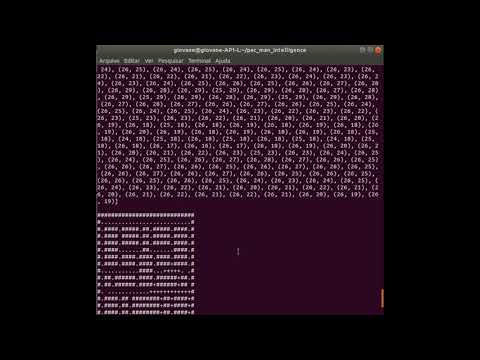

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('m4NgLzOgEAw', width=800, height=300)

## 8 Conclusões

Durante todo o processo de desenvolvimento da solução para o problema do Pacman ficou deveras claro que a modelagem do problema influi fortemente na forma como toda a solução irá evoluir, incluindo as dificuldades, ou não, na implementação das buscas. De fato, o problema de estar bem definido e trabalhado na sua forma mais simplificada possível.

As heurísticas se mostraram um diferencial também no sentido de que elas alteram o custo final, inclusive os valores divergentes entre si, mas isso vai da forma como os cálculos são feitos. No caso deste presente trabalho, ambas não superestimaram o custo da solução e apresentaram bons resultados no final das contas. De modo geral, as buscas informadas mostraram um desempenho melhor, na questão de determinar o custo total da solução, do que os demais. O pior desempenho foi do local search Simulated Annealing. Nesse caso é de se pensar se esse tipo de algoritmo serve para esse tipo de problema.

Para finalizar, as análises de hardware mostraram que, possivelmente, o item mais importante seja o consumo de memória, em seguida da CPU, mas isso também varia de solução para solução, já que os algoritmos de busca informada foram mais custosos computacionalmente do que as buscas cegas, mas o local search foi com certeza o mais custoso, o que reforça a tese de que não há um algoritmo perfeito, mas sim aquele(s) que se encaixa melhor para a solução.